In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
np.set_printoptions(threshold=sys.maxsize)

In [5]:
def calcHist(img,channel):
    '''
    calculate the historgram of a channel
    if channel is 3 calculate the gray-scale img historgram
    return a histrogram list of the specific channel 
    '''
    his_list = [0] * 256
    if channel ==3:
        try:
            img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        except:
            None
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                his_list[img[i][j]]+=1
    else:
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                his_list[img[i][j][channel]]+=1
    return his_list

calcHist(img,channel):
    
可以針對一張彩色的圖片進行各通道historgram的分布，若通道值為3則將進行灰階的計算。

創建一個大小為256的his_list，之後再遍佈圖片的每一個pixel，將其對應的值在his_list裡面做計數，最後再回傳整個list結果。


In [6]:
def show_bgr_his(img,color=('b','g','r')):
    '''
    show the figure of the historgram of a color img
    '''
    max_y=0
    for i, col in enumerate(color):
        histr = calcHist(img,i)
        #plt.bar(range(len(histr)), histr)
        plt.plot(histr, color = col,label=color[i])
        plt.legend(loc='upper right')
        if(max_y<max(histr)):
            max_y=max(histr)
    plt.xlim([-5, 256])
    plt.show()

show_bgr_his(img,color=('b','g','r')): 

可以針對一張rgb的圖片透過呼叫calcHist()得到histr，再畫出其rgb通道的historgram 的圖片，方便觀看其分布狀況。

In [7]:
def show_gray_his_bar(img):
    '''
    show the bar figure of the historgram of a gray img
    '''
    histr = calcHist(img,3)
    plt.bar(range(len(histr)), histr,label='historgram',color='b')
    for i in range(1,len(histr)):
        histr[i]+=histr[i-1]
    plt.plot(histr, color = 'r',label='cdf')
    plt.legend(loc='upper right')
    plt.xlim([-5, 256])
    plt.show()


show_gray_his_bar(img):

 可以針對一張圖片畫出其gray scale的historgram圖片，透過呼叫calcHist()得到hist，並且同步計算cdf將趨勢圖一併化上，方便觀看其分布狀況。

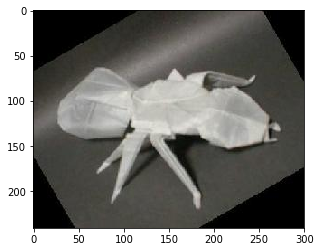

(241, 300, 3)


In [8]:
img_name='ant.jpg'
img=cv2.imread(img_name)
plt.imshow(img[:,:,::-1] )
plt.show()
print(img.shape)
plt.close()

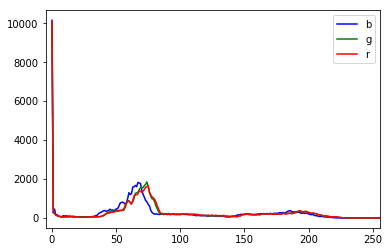

In [9]:
show_bgr_his(img)

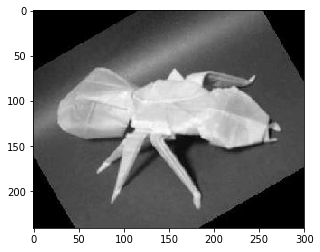

(241, 300)


In [10]:
gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap ='gray')
plt.show()
print(gray_img.shape)


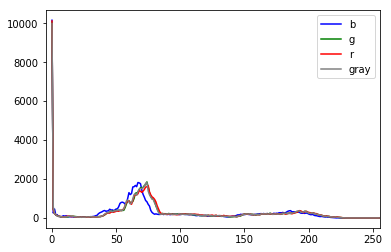

In [11]:
show_bgr_his(img,color=('b','g','r','gray'))

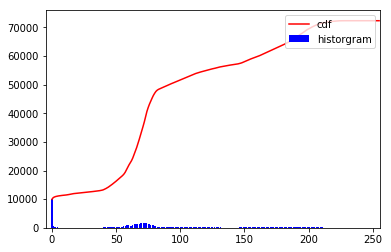

In [12]:
show_gray_his_bar(img)

In [13]:
def historgram_equilization(img):
    output=[0]*256
    histr = calcHist(img,3)
    cdf=histr.copy()
    for i in range(1,len(cdf)):
        cdf[i]+=cdf[i-1]
    min_gray=0
    max_gray=0
    for i in range(len(histr)):
        if not histr[i]==0:
            min_gray=i
            break
    for i in range(len(histr)-1,-1,-1):
        if not histr[i]==0:
            max_gray=i
            break
    for i in range(len(output)):
        output[i]=round(((cdf[i]-cdf[0])/(cdf[255]-cdf[0]))*255)
    return output

historgram_equilization(img):

這個方法通常用來增加許多圖像的全局對比度，尤其是當圖像的有用數據的對比度相當接近的時候。通過這種方法，亮度可以更好地在直方圖上分布。這樣就可以用於增強局部的對比度而不影響整體的對比度，直方圖均衡化通過

有效地擴展常用的亮度來實現這種功能。也可以做為edge detection前的預處理，將圖片進行對比度的增強，對於邊緣就可以有效的強化。

基本上就是參照講義上的公式進行計算，其中有一向是cdf式將每一個灰階值進行累積，根據下列公式，達到出現頻率正規化的效果。

根據這個公式會得到一個table，這個table代表原先的灰階值應該對應到何種值，才可以使得出現的機率均值化，之後在將原圖根據這個table進行轉換得到正規化後的結果。
 
![Image of Yaktocat](eq.png)
 
 
![Image of Yaktocat](https://upload.wikimedia.org/wikipedia/commons/c/ca/Histogrammeinebnung.png)

In [14]:
table=historgram_equilization(img)

In [15]:
result=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
for i in range(result.shape[0]):
    for j in range(result.shape[1]):
        result[i][j]=table[result[i][j]]

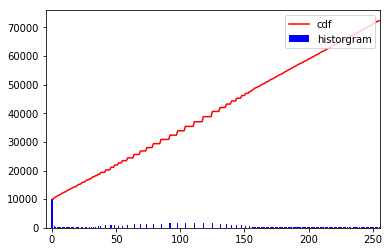

In [16]:
show_gray_his_bar(result)

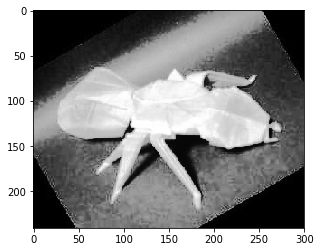

(241, 300)


In [17]:
plt.imshow(result, cmap ='gray')
plt.show()
print(result.shape)


In [18]:
def convolution(img,matrix_input):
    '''
    according to the input matrix, make padding for the img
    do the 2-D convolution and return the result
    '''
    matrix=matrix_input.copy()
    result=img.copy()
    pad_num=int(len(matrix)/2)
    img_padding=np.pad(img, pad_width=((pad_num,pad_num),(pad_num,pad_num)), mode='constant', constant_values=0)
    result_list=[]
    for i in range(pad_num,img_padding.shape[0]-pad_num):
        row_list=[]
        for j in range(pad_num,img_padding.shape[1]-pad_num):
            sum=0
            for m in range(len(matrix)):
                for n in range(len(matrix[0])):
                    sum+=img_padding[i+m-pad_num][j+n-pad_num]*matrix[m][n]
            row_list.append(sum)
        result_list.append(row_list)
    return np.array(result_list)

convolution(img,matrix_input): 

首先為了保持圖片進行完conv的結果是大小一致的，因此要先進行padding，所以根據要conv的matrix先計算出需要padding的大小，之後再進行補值。

之後再針對padding完後的圖片，針對每一個pixel將matrix當成一個遮不遮上去，進行對應的值相乘之後做總合，做為結果圖該pixel的值，將整張圖片每個pixel掃過一遍後，即可得到結果圖。

不過要注意一點是，因做完convolution可能會出現負值會超過255的值，因此格式變成16sign-bit，所以要在進行格式上的轉換轉換成8bit輸出結果才會正確。

<img src="padding.png" alt="Drawing" style="width: 305px;"/>
<img src="conv.png" alt="Drawing" style="high: 200px;"/>

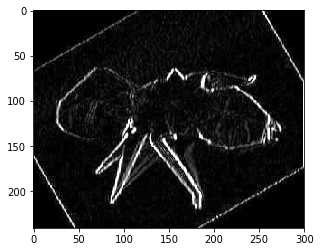

In [19]:
sobel_x=[[1,0,-1],[2,0,-2],[1,0,-1]]
sobel_x_img=convolution(gray_img,sobel_x)
sobel_x_img=cv2.convertScaleAbs(sobel_x_img)
sobel_x_result=convolution(result,sobel_x)
sobel_x_result=cv2.convertScaleAbs(sobel_x_result)
plt.imshow(sobel_x_img, cmap ='gray')
plt.show()

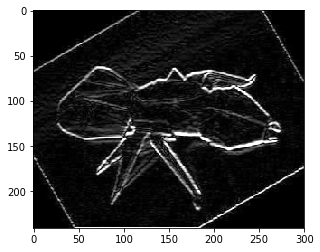

In [20]:
sobel_y=[[-1,-2,-1],[0,0,0],[1,2,1]]
sobel_y_img=convolution(gray_img,sobel_y)
sobel_y_img=cv2.convertScaleAbs(sobel_y_img)
sobel_y_result=convolution(result,sobel_y)
sobel_y_result=cv2.convertScaleAbs(sobel_y_result)
plt.imshow(sobel_y_img, cmap ='gray')
plt.show()

In [21]:
def combine_sobel_xy(x,y):
    col_list=[]
    for i in range(x.shape[0]):
        row_list=[]
        for j in range(x.shape[1]):
            row_list.append((x[i][j]**2+y[i][j]**2)**0.5)
        col_list.append(row_list)
    return np.array(col_list)

combine_sobel_xy(x,y):

將sobel_x與sobel_y進行平方相加後開根號，得到兩個主方向的最終結果。

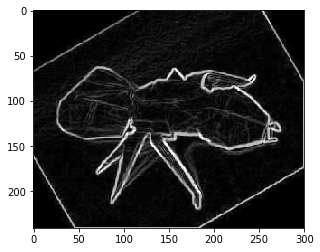

In [22]:
sobel_xy_img=combine_sobel_xy(sobel_x_img,sobel_y_img)
sobel_xy_result=combine_sobel_xy(sobel_x_result,sobel_y_result)
plt.imshow(sobel_xy_img, cmap ='gray')
plt.show()

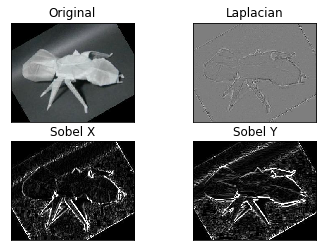

In [23]:
laplacian = cv2.Laplacian(gray_img,cv2.CV_64F)
sobelx = cv2.Sobel(result,cv2.CV_16S,1,0,ksize=3)
sobely = cv2.Sobel(result,cv2.CV_16S,0,1,ksize=3)
#print(sobelx)
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(cv2.convertScaleAbs(sobelx),cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(cv2.convertScaleAbs(sobely),cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

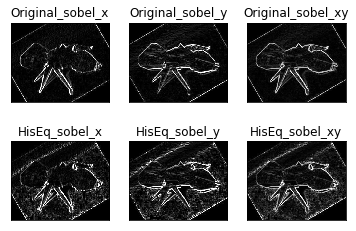

In [24]:
plt.subplot(2,3,1),plt.imshow(sobel_x_img,cmap = 'gray')
plt.title('Original_sobel_x'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,2),plt.imshow(sobel_y_img,cmap = 'gray')
plt.title('Original_sobel_y'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,3),plt.imshow(sobel_xy_img,cmap = 'gray')
plt.title('Original_sobel_xy'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,4),plt.imshow(sobel_x_result,cmap = 'gray')
plt.title('HisEq_sobel_x'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,5),plt.imshow(sobel_y_result,cmap = 'gray')
plt.title('HisEq_sobel_y'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,6),plt.imshow(sobel_xy_result,cmap = 'gray')
plt.title('HisEq_sobel_xy'), plt.xticks([]), plt.yticks([])
#plt.figure(figsize=(20,5))
plt.show()

In [25]:
#Bonus~~~
 
def CannyThreshold(lowThreshold):
    detected_edges = cv2.GaussianBlur(gray,(5,5),0)
    detected_edges = cv2.Canny(detected_edges,lowThreshold,lowThreshold*ratio,apertureSize = kernel_size)
    dst = cv2.bitwise_and(img,img,mask = detected_edges)  # just add some colours to edges from original image.
    cv2.imshow('canny demo',dst)
 
lowThreshold = 0
max_lowThreshold = 100
ratio = 3
kernel_size = 3
 
img = cv2.imread(img_name)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
 
cv2.namedWindow('canny demo')
 
cv2.createTrackbar('Min threshold','canny demo',lowThreshold, max_lowThreshold, CannyThreshold)
 
CannyThreshold(0)  # initialization
if cv2.waitKey(0) == 27:
    cv2.destroyAllWindows()

CannyThreshold(lowThreshold):

主要做了以下幾點運算

1.減少噪音:
因為邊緣檢測對噪音非常敏感，所以實現邊緣檢測的第一步，是使用高斯濾波器對影象中的噪音進行移除。
高斯模糊:有點向convolution的概念，將一個pixel與週圍進行比較，若是該pixel的值特別突出，就會被周圍的值平滑化，針對胡椒鹽雜訊有很好的抑制效果，在處理螞蟻那張圖片實，如果把kernel size改成5*5就有機會將背景紙張的邊際模糊掉，讓後續的edge detection可以找到螞蟻的完整輪廓。

2.Sobel_xy:
同作業的sobel做法，用意在於找到xy方向梯度之變化，若是梯度變化大，則很有可能為物體的輪廓。

3.非最大化抑制(nms)上述獲取梯度的大小和方向之後，一張移除了不想要的畫素（這些畫素是指不組成邊的）全圖，為了得到這張全圖（為了移除這些畫素），對每一個畫素進行查驗，判斷它是否是梯度方向上的像零點的相鄰最大值(local maximum)。

<img src="nms.png" alt="Drawing" style="high: 200px;"/>

上圖為例，梯度方向是正交與（is normal to )邊，點A在邊上（垂直方向），點B和點C在梯度方向上。所以點A就會被查驗是否和點B、點C相比較，判斷它是否是相鄰最大值(local maximum)。是的話，A被認為是下一個next stage;不是的話，則為0。
得到一個“thin edge".

4.雙閥值: 
進一步，來判斷上訴結果中，哪一個是真正的邊。為了實現這個，需要兩個minVal和maxVal的閾值。所有邊的強度梯度超過maxval確定為邊，低於minVal的確定不為邊（丟棄）。基於中間的判斷是否為邊是根據其連續性（connectivity）；如果它和"確定邊"的畫素相連，則為邊；如果和"不為邊"的畫素相連，則不為邊（丟棄)。
下圖中，邊A是在maxVal之上，是“確定邊”，雖然邊C在maxVal之下（minVal）之上，但它和邊A相連，所以認為它是有效邊，這樣我們就得到了一個完整的曲線。但是對於邊B，雖然和邊C在同一個區域，但它沒有和“確認邊”相連，故丟棄。
概念上像是os中需要做context switch，如果只設定一個單一threshold的化會context switch太頻繁，因此設定兩個threshold可以有效的減少switch，在影像這邊則可以減少一些比較細小的edge，只找到真的明顯的輪廓並同時保持其證確與完整性

<img src="threshold.png" alt="Drawing" style="high: 200px;"/>
